<a href="https://colab.research.google.com/github/animeqvin/Linear-Regression_PyTorch/blob/main/lets_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

In [150]:
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X +bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [151]:
 train_split=int(0.8 *len(X))
 X_train, y_train= X[:train_split], y[:train_split]
 X_test, y_test= X[train_split:], y[train_split:]
 len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

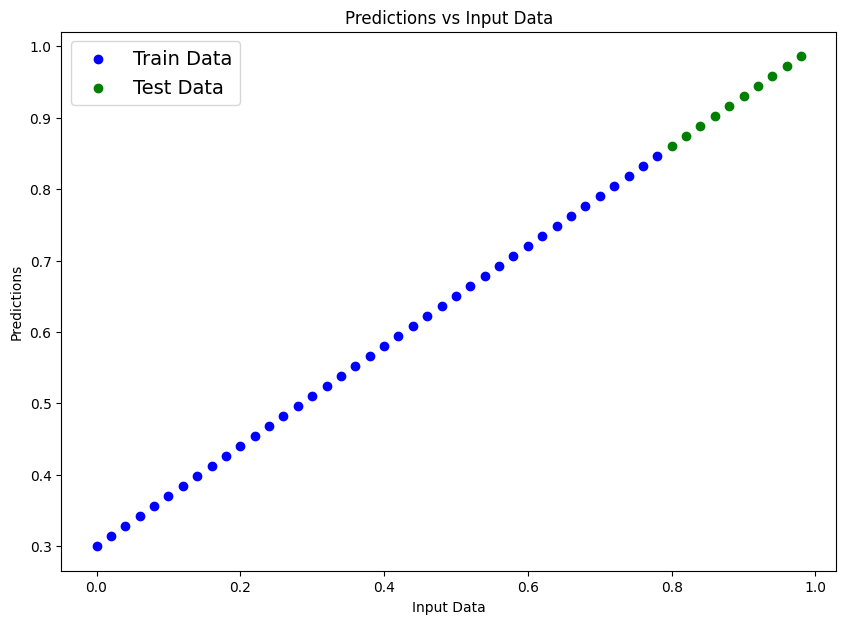

In [152]:
def plot_predictions(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_label, c="b", label="Train Data")
    plt.scatter(test_data, test_label, c="g", label="Test Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend(prop={"size": 14})
    plt.xlabel("Input Data")
    plt.ylabel("Predictions")
    plt.title("Predictions vs Input Data")
    plt.show()

plot_predictions()

In [153]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linear(x)

In [154]:
torch.manual_seed(42)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)  # Example linear layer

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()
parameters = list(model.parameters())
print(parameters)


[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]


In [155]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [156]:
#predicts how well predicts y_test using X_test
with torch.inference_mode():
  y_preds= model.forward(X_test)
y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

In [157]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

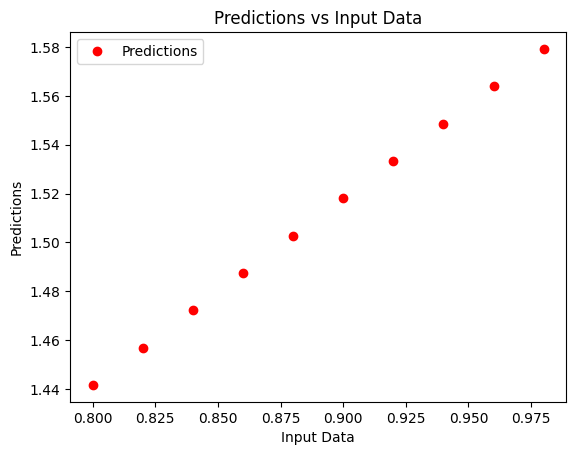

In [158]:
def plot_predictions(input_data, predictions):
    # Plotting the input data and corresponding predictions
    plt.plot(input_data, predictions, 'ro', label='Predictions')
    plt.xlabel('Input Data')
    plt.ylabel('Predictions')
    plt.title('Predictions vs Input Data')
    plt.legend()
    plt.show()

# Assuming you have obtained the predictions, y_preds, and the corresponding input data, X_test, from your model
plot_predictions(input_data=X_test, predictions=y_preds)



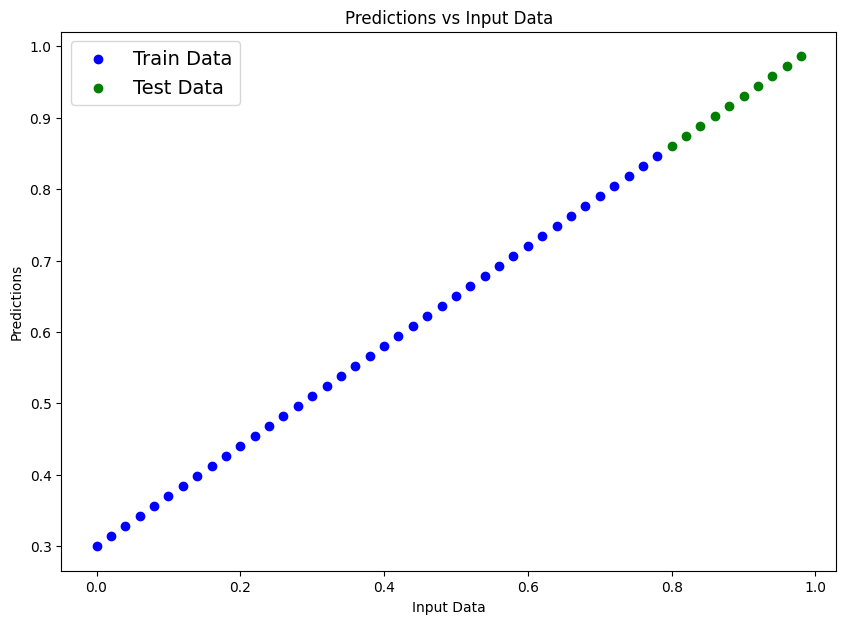

In [159]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))  # Create a figure

    # Plot training data
    plt.scatter(train_data, train_labels, c="b", label="Train Data")

    # Plot testing data
    plt.scatter(test_data, test_labels, c="g", label="Test Data")

    # Plot predictions if provided
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions")

    plt.legend(prop={"size": 14})
    plt.xlabel("Input Data")
    plt.ylabel("Predictions")
    plt.title("Predictions vs Input Data")

plot_predictions()



In [160]:
loss_fb=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.01 )
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [161]:
epochs=106
epoch_count=[]
loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
  model.train()
  y_pred=model(X_train)
  loss=loss_fb(y_pred, y_train)
  print(f"loss= {loss}")
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #testing
  model.eval()
  with torch.inference_mode():
    test_pred=model(X_test)
    test_loss=loss_fb(test_pred, y_test)
  if epoch %10 ==0:
    epoch_count.append(epoch)
    test_loss_values.append(test_loss)
    loss_values.append(loss)
    print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}" )

  print(model.state_dict())

loss= 0.5551779866218567
epoch: 0 | loss: 0.5551779866218567 | test loss: 0.5739762187004089
OrderedDict([('linear.weight', tensor([[0.7606]])), ('linear.bias', tensor([0.8200]))])
loss= 0.5436569452285767
OrderedDict([('linear.weight', tensor([[0.7567]])), ('linear.bias', tensor([0.8100]))])
loss= 0.5321359634399414
OrderedDict([('linear.weight', tensor([[0.7528]])), ('linear.bias', tensor([0.8000]))])
loss= 0.5206149816513062
OrderedDict([('linear.weight', tensor([[0.7489]])), ('linear.bias', tensor([0.7900]))])
loss= 0.5090939998626709
OrderedDict([('linear.weight', tensor([[0.7450]])), ('linear.bias', tensor([0.7800]))])
loss= 0.49757298827171326
OrderedDict([('linear.weight', tensor([[0.7411]])), ('linear.bias', tensor([0.7700]))])
loss= 0.4860519766807556
OrderedDict([('linear.weight', tensor([[0.7372]])), ('linear.bias', tensor([0.7600]))])
loss= 0.47453099489212036
OrderedDict([('linear.weight', tensor([[0.7333]])), ('linear.bias', tensor([0.7500]))])
loss= 0.4630100131034851
O

In [162]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.6793]])),
             ('linear.bias', tensor([0.3085]))])

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.8519],
        [0.8655],
        [0.8791],
        [0.8927],
        [0.9063],
        [0.9198],
        [0.9334],
        [0.9470],
        [0.9606],
        [0.9742]])


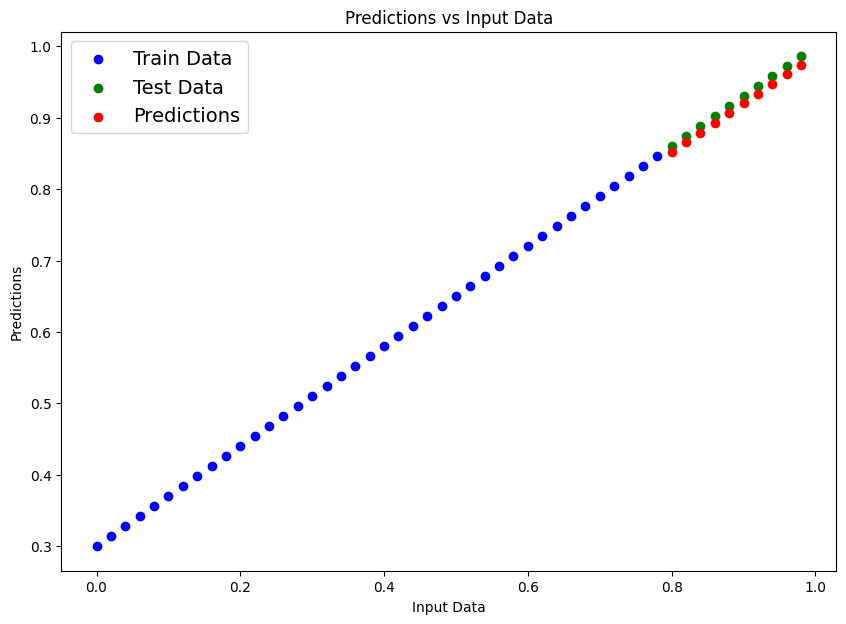

In [163]:
with torch.inference_mode():
    y_pred = model.forward(X_test)
y_pred
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_pred)}")
print(f"Predicted values:\n{y_pred}")
plot_predictions(predictions=y_pred)
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.01)

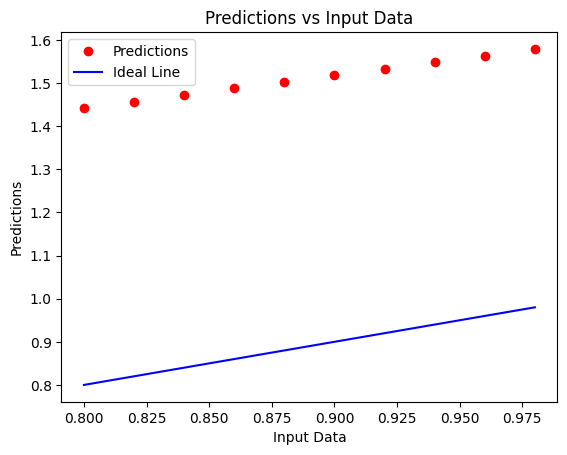

In [164]:
def plot_predictions(input_data, predictions):
    # Plotting the input data and corresponding predictions
    plt.plot(input_data, predictions, 'ro', label='Predictions')
    plt.plot(input_data, input_data, 'b-', label='Ideal Line')  # Add ideal line
    plt.xlabel('Input Data')
    plt.ylabel('Predictions')
    plt.title('Predictions vs Input Data')
    plt.legend()
    plt.show()

# Assuming you have obtained the predictions, y_preds, and the corresponding input data, X_test, from your model
plot_predictions(X_test, y_preds)




In [165]:
from pathlib import Path
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME='01_pythotch_workflow.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH
print(f"Saving model to:{MODEL_SAVE_PATH}")

MODEL_SAVE_PATH = "final_model.pth"
torch.save(model.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved successfully at {MODEL_SAVE_PATH}")

Saving model to:models/01_pythotch_workflow.pth
Model saved successfully at final_model.pth


In [166]:
!ls -l models

total 0


In [167]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load("final_model.pth"))
loaded_model.to(device)  # Move the model to the correct device
loaded_model.eval()  # Set to evaluation mode

print("Model loaded successfully!")

Model loaded successfully!


In [168]:
loaded_model.eval()
with torch.inference_mode():
    X_test = X_test.to(device)  # Ensure X_test is on the correct device
    loaded_model_preds = loaded_model(X_test)  # Make predictions

In [169]:
model.to(device)  # Move the model to the correct device (CPU or GPU)

model.eval()
with torch.inference_mode():
    X_test = X_test.to(device)  # Move input to correct device
    y_preds = model(X_test)  # Generate predictions with the same model

# Move both predictions to the same device before comparison
y_preds = y_preds.to(device)
loaded_model_preds = loaded_model_preds.to(device)

# Now check if they match
if torch.allclose(y_preds, loaded_model_preds, atol=1e-6):
    print("Predictions match!")
else:
    print("Predictions do not match.")

Predictions match!


In [170]:
model.eval()
with torch.inference_mode():
  y_preds=model(X_test)
  loaded_model_preds=loaded_model(X_test)
#loaded_model_preds
y_preds

tensor([[0.8519],
        [0.8655],
        [0.8791],
        [0.8927],
        [0.9063],
        [0.9198],
        [0.9334],
        [0.9470],
        [0.9606],
        [0.9742]], device='cuda:0')

In [171]:
torch.__version__

'2.6.0+cu124'

In [172]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"device is using: {device}")

device is using: cuda


In [175]:
print("Predictions match!")
print(f"Final model is on device: {next(model.parameters()).device}")

Predictions match!
Final model is on device: cuda:0
